In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns 
from noise import pnoise2
import PIL.Image
from tqdm.auto import tqdm
from scipy.ndimage import gaussian_filter

from typing import Tuple

from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math
from IPython.display import (
    display, display_html, display_png, display_svg
)

import importlib

14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Initializing WaterLayer with size=256
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Starting water layer generation
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Created 2704 lake cells with volume 126.721
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Starting water layer generation
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Created 2704 lake cells with volume 126.721
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Traced 23 rivers with total volume 8.571
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Traced 23 rivers with total volume 8.571
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Water generation complete: range=[0.000, 1.000], lake_volume=126.721, river_volume=8.571
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Layer generation completed
14:40:55 - infinitile.WaterLayer_127457577654256 - INFO - Saving layer to water.png with c

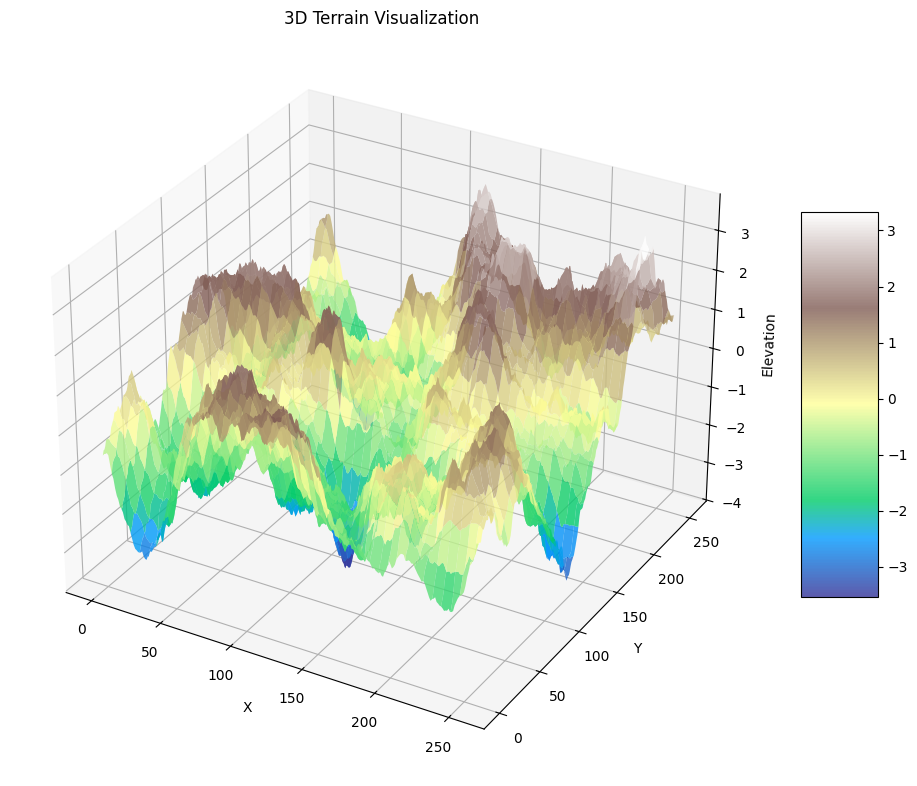

In [97]:
import infinitile.generators as generators
importlib.reload(generators)

earth = generators.EarthLayer(
    coord=(0, 1), size=256, scale=0.01, octaves=12, map_seed=(0, 0)
)
earth.save("earth.png")

precipitation = generators.PrecipitationLayer(elevation=earth,
                                      wind_direction='south')
precipitation.save("precipitation.png")

water = generators.WaterLayer(elevation=earth, precipitation=precipitation,
                                water_level=0.2,
                                logging_level="INFO")
water.save("water.png")



In [85]:
# Import the visualization module
import infinitile.visualizers as viz
import importlib
importlib.reload(viz)  # Reload to get bug fix
import logging

# Create a visualizer instance with debug logging to see what's happening
visualizer = viz.TerrainVisualizer(logging_level=logging.INFO)

print("Available terrain layers:")
print(f"- Earth layer: {earth.size}x{earth.size} ({earth.layer.min():.3f} to {earth.layer.max():.3f})")
print(f"- Precipitation layer: {precipitation.size}x{precipitation.size} ({precipitation.layer.min():.3f} to {precipitation.layer.max():.3f})")
print(f"- Water layer: {water.size}x{water.size} ({water.layer.min():.3f} to {water.layer.max():.3f})")

2025-07-01 14:10:32,195 - infinitile.TerrainVisualizer_127457577657616 - INFO - TerrainVisualizer initialized


Available terrain layers:
- Earth layer: 256x256 (-0.388 to 0.375)
- Precipitation layer: 256x256 (0.000 to 1.000)
- Water layer: 256x256 (0.000 to 1.000)


2025-07-01 14:10:32,227 - infinitile.TerrainVisualizer_127457577657616 - INFO - Single layer plot created for EarthLayer


=== Individual Layer Plots ===


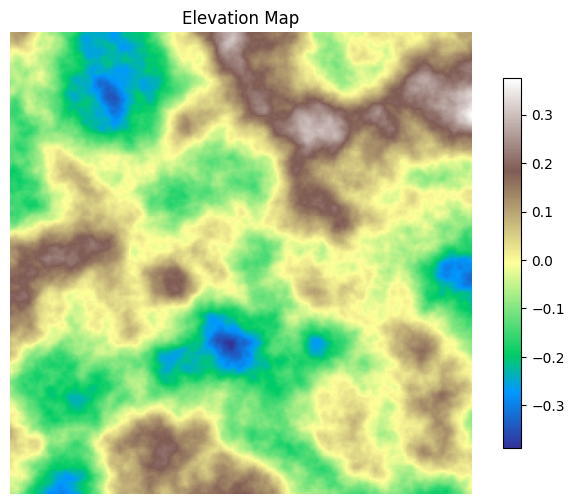

2025-07-01 14:10:32,447 - infinitile.TerrainVisualizer_127457577657616 - INFO - Single layer plot created for PrecipitationLayer


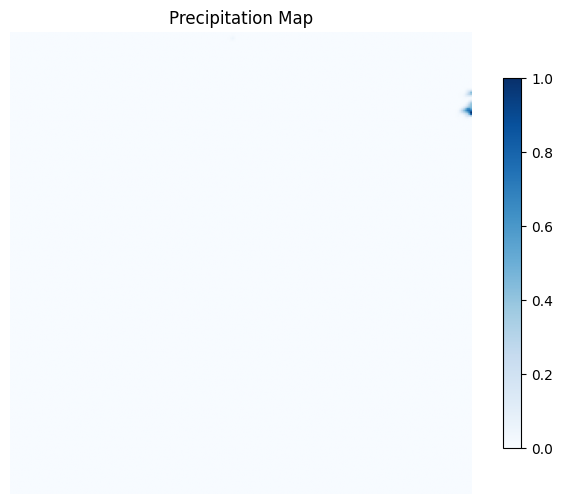

2025-07-01 14:10:32,613 - infinitile.TerrainVisualizer_127457577657616 - INFO - Single layer plot created for WaterLayer


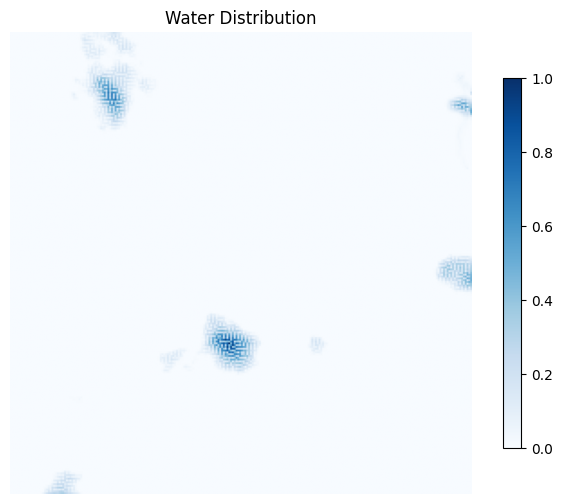

In [86]:
# 1. Individual Layer Visualizations
print("=== Individual Layer Plots ===")

# Plot each layer individually with appropriate colormaps
fig1, ax1 = visualizer.plot_single_layer(earth, title="Elevation Map", figsize=(8, 6))
plt.show()

fig2, ax2 = visualizer.plot_single_layer(precipitation, title="Precipitation Map", figsize=(8, 6))
plt.show()

fig3, ax3 = visualizer.plot_single_layer(water, title="Water Distribution", figsize=(8, 6))
plt.show()

2025-07-01 14:10:32,923 - infinitile.TerrainVisualizer_127457577657616 - INFO - Grid plot created for 3 layers



=== Grid Layout Visualization ===


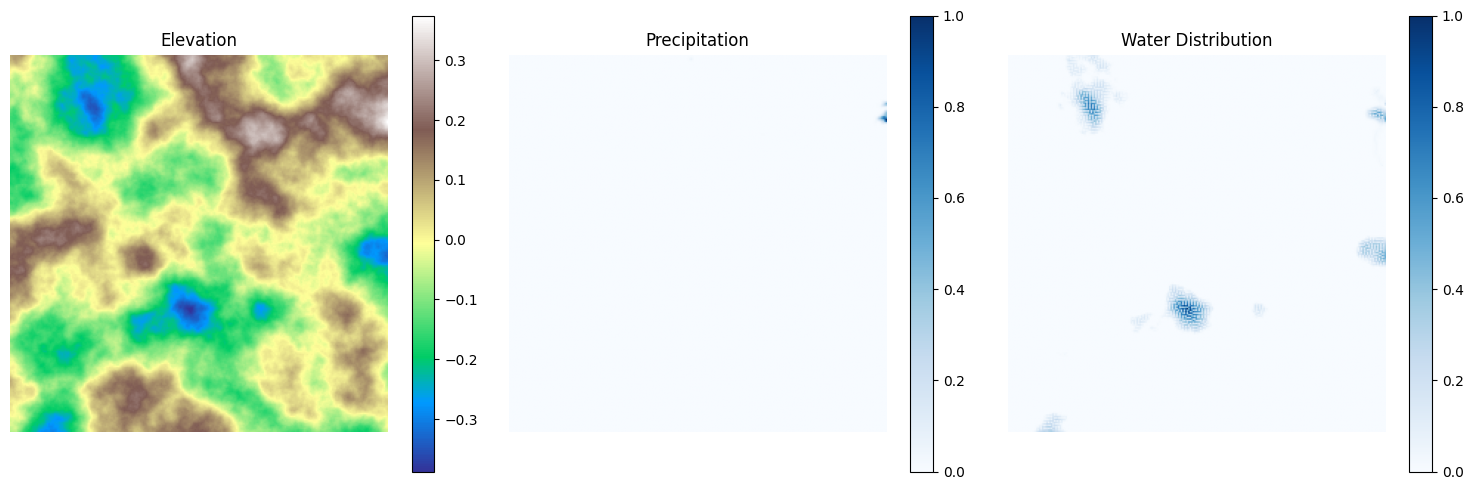

In [87]:
# 2. Grid Layout - All layers at once
print("\n=== Grid Layout Visualization ===")

layers = [earth, precipitation, water]
titles = ["Elevation", "Precipitation", "Water Distribution"]

fig_grid, axes_grid = visualizer.plot_layer_grid(
    layers=layers, 
    titles=titles, 
    figsize=(15, 5)
)
plt.show()

2025-07-01 14:10:33,258 - infinitile.TerrainVisualizer_127457577657616 - INFO - Composite map created



=== Composite Map ===


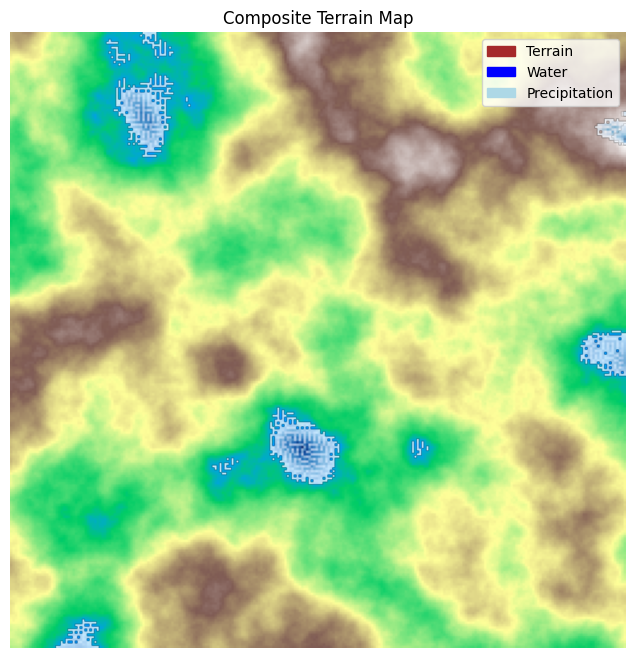

In [88]:
# 3. Composite Map - Layered visualization
print("\n=== Composite Map ===")

fig_comp, ax_comp = visualizer.create_composite_map(
    elevation=earth,
    water=water,
    precipitation=precipitation,
    alpha_water=0.8,
    alpha_precip=0.4,
    figsize=(10, 8)
)
plt.show()

2025-07-01 14:10:33,687 - infinitile.TerrainVisualizer_127457577657616 - INFO - Shaded heightmap created



=== 2.5D Visualizations ===
Creating shaded relief map...


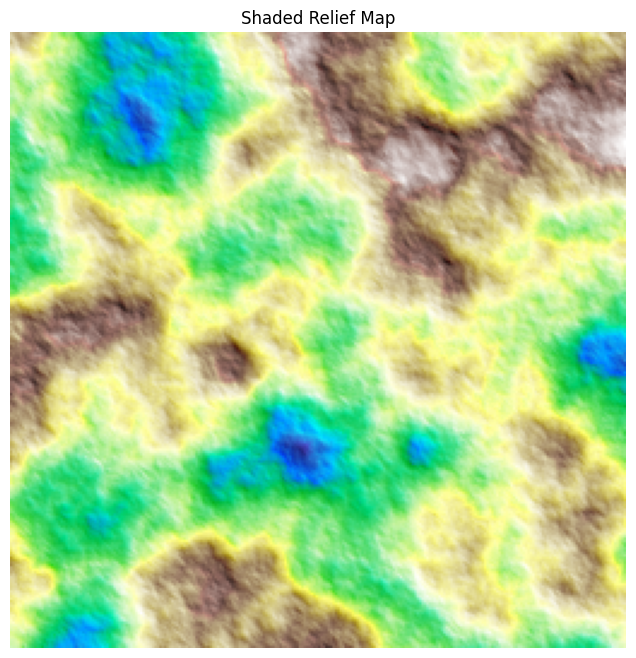

2025-07-01 14:10:34,169 - infinitile.TerrainVisualizer_127457577657616 - INFO - Contour map created


Creating contour map...


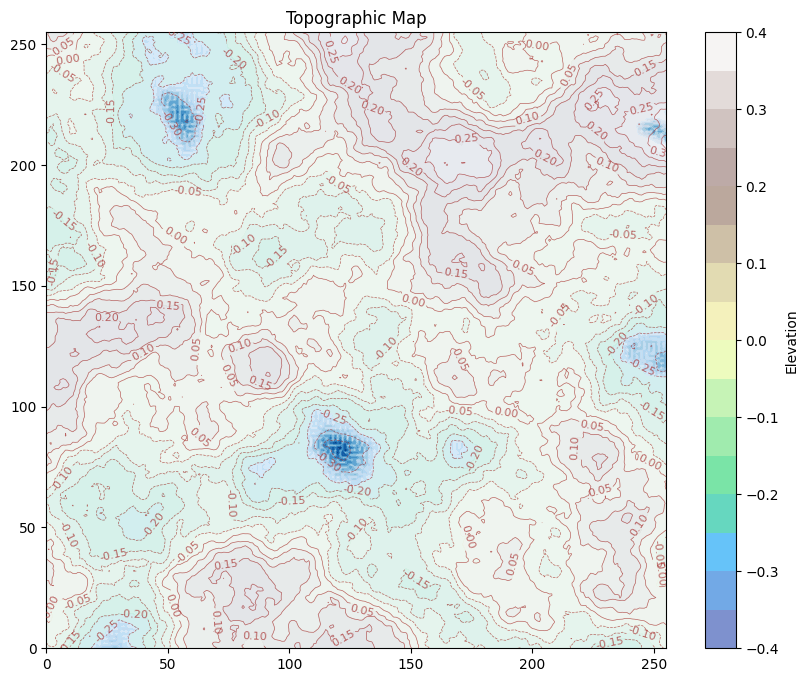

In [89]:
# 4. 2.5D Visualizations
print("\n=== 2.5D Visualizations ===")

# Shaded relief map
print("Creating shaded relief map...")
fig_shaded, ax_shaded = visualizer.plot_heightmap_shaded(
    elevation=earth,
    azimuth=315,  # Light from northwest
    altitude=45,  # 45-degree angle
    figsize=(10, 8)
)
plt.show()

# Contour map
print("Creating contour map...")
fig_contour, ax_contour = visualizer.plot_contour_map(
    elevation=earth,
    water=water,
    levels=15,
    figsize=(10, 8)
)
plt.show()

2025-07-01 14:10:34,470 - infinitile.TerrainVisualizer_127457577657616 - INFO - Isometric view created


Creating isometric view...


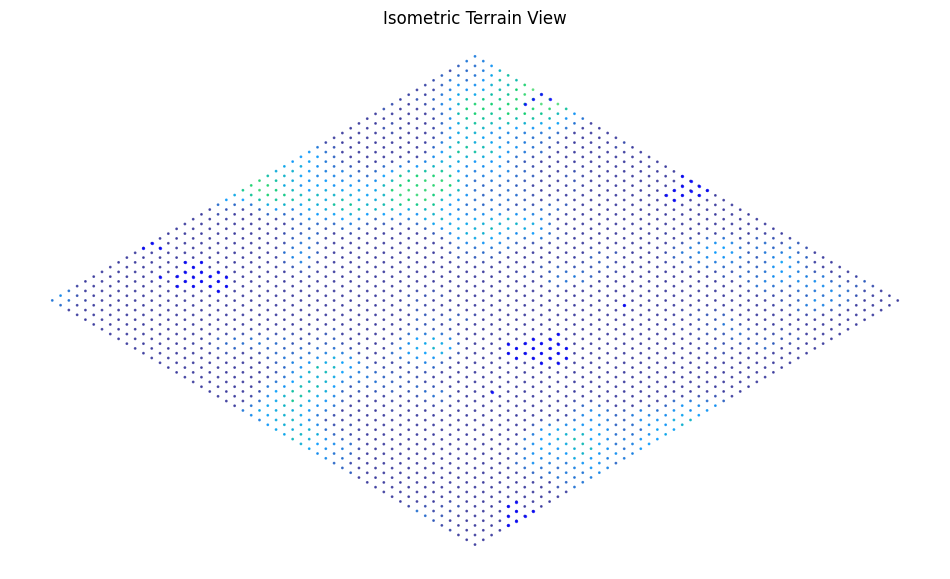

In [90]:
# Isometric view
print("Creating isometric view...")
fig_iso, ax_iso = visualizer.plot_isometric_view(
    elevation=earth,
    water=water,
    scale_factor=0.4,
    figsize=(12, 8)
)
plt.show()


=== 3D Surface Visualization ===


2025-07-01 14:10:34,803 - infinitile.TerrainVisualizer_127457577657616 - INFO - 3D surface plot created


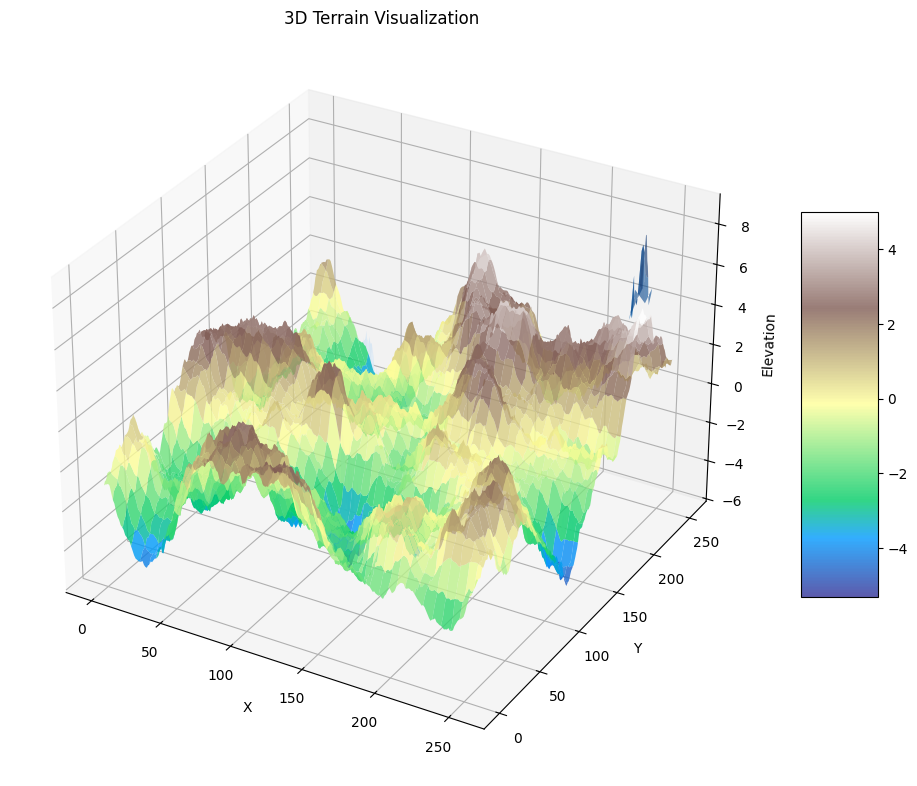

3D surface plot created successfully!


In [91]:
# 5. 3D Surface Visualization
print("\n=== 3D Surface Visualization ===")

try:
    fig_3d, ax_3d = visualizer.plot_3d_surface(
        elevation=earth,
        water=water,
        figsize=(12, 10),
        elevation_scale=15  # Exaggerate elevation for better visibility
    )
    plt.show()
    print("3D surface plot created successfully!")
except ImportError as e:
    print(f"3D plotting not available: {e}")
    print("Falling back to enhanced 2D visualization...")
    # Fallback to enhanced 2D
    fig_fb, ax_fb = visualizer.plot_single_layer(earth, "Elevation (2D)", figsize=(10, 8))
    plt.show()

In [92]:
# 6. Interactive Plotly Visualization (if available)
print("\n=== Interactive Plotly Visualization ===")

try:
    plotly_fig = visualizer.create_interactive_plotly(
        elevation=earth,
        water=water,
        precipitation=precipitation
    )
    plotly_fig.show()
    print("Interactive Plotly visualization created!")
except ImportError as e:
    print(f"Plotly not available: {e}")
    print("Install Plotly with: pip install plotly")
    print("Falling back to matplotlib dashboard...")
    
    # Create matplotlib dashboard instead
    dashboard_fig = visualizer._create_matplotlib_dashboard(
        elevation=earth,
        water=water,
        precipitation=precipitation
    )
    plt.show()
except Exception as e:
    print(f"Error creating interactive visualization: {e}")

2025-07-01 14:10:35,766 - infinitile.TerrainVisualizer_127457577657616 - INFO - Interactive Plotly visualization created



=== Interactive Plotly Visualization ===


Interactive Plotly visualization created!



=== Convenience Functions ===
Using quick plotting functions...


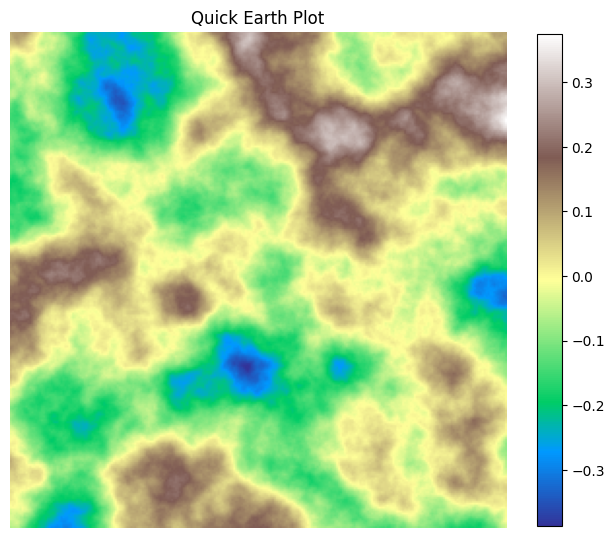

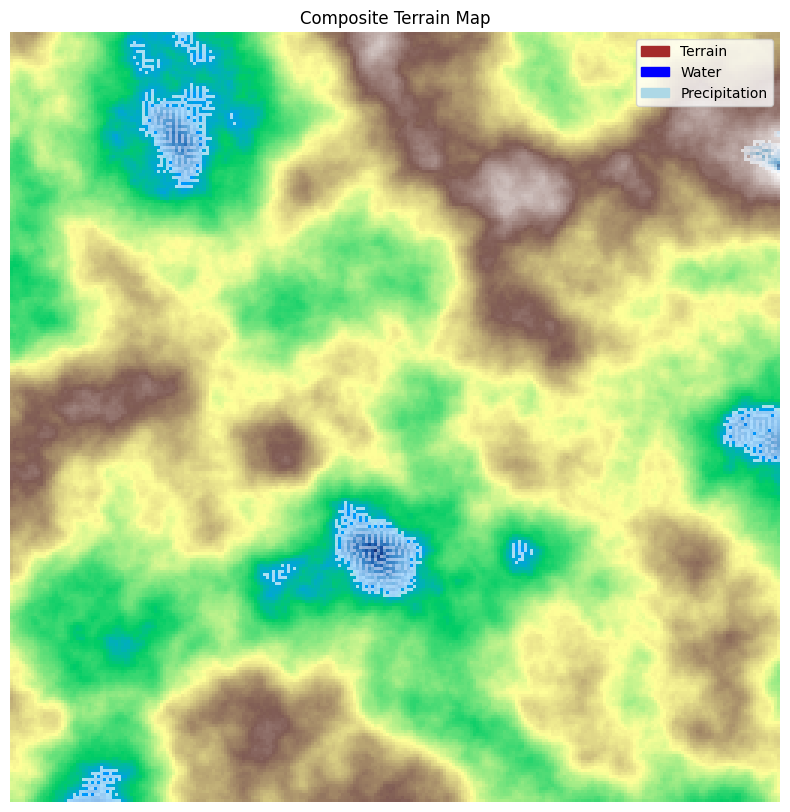

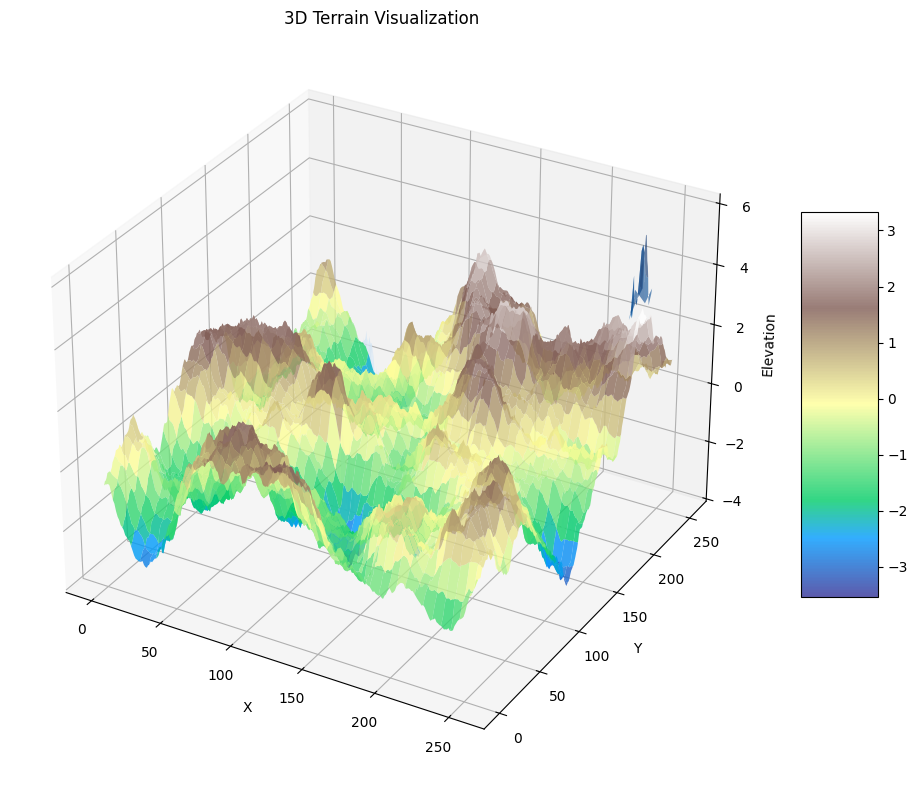

In [93]:
# 7. Convenience Functions and Quick Analysis
print("\n=== Convenience Functions ===")

# Quick plotting using convenience functions
print("Using quick plotting functions...")

# Quick single layer plot
fig_quick1, ax_quick1 = viz.quick_plot(earth, title="Quick Earth Plot")
plt.show()

# Quick composite
fig_quick2, ax_quick2 = viz.quick_composite(earth, water, precipitation)
plt.show()

# Quick 3D (with fallback)
try:
    fig_quick3, ax_quick3 = viz.quick_3d(earth, water)
    plt.show()
except:
    print("3D quick plot not available, already showed fallback")

In [94]:
# 8. Terrain Analysis and Statistics
print("\n=== Terrain Analysis ===")

# Analyze the generated terrain
print("Terrain Statistics:")
print("-" * 40)

# Elevation statistics
elev_stats = earth._repr_json_()
print(f"Elevation - Min: {elev_stats['min']}, Max: {elev_stats['max']}, Mean: {elev_stats['average']}, Std: {elev_stats['std']}")

# Precipitation statistics  
precip_stats = precipitation._repr_json_()
print(f"Precipitation - Min: {precip_stats['min']}, Max: {precip_stats['max']}, Mean: {precip_stats['average']}, Std: {precip_stats['std']}")

# Water statistics
water_stats = water._repr_json_()
print(f"Water - Min: {water_stats['min']}, Max: {water_stats['max']}, Mean: {water_stats['average']}, Std: {water_stats['std']}")

# Calculate some interesting metrics
elevation_range = elev_stats['max'] - elev_stats['min']
water_coverage = np.sum(water.layer > 0.1) / (water.size * water.size) * 100
high_precip_areas = np.sum(precipitation.layer > 0.5) / (precipitation.size * precipitation.size) * 100

print(f"\nDerived Metrics:")
print(f"Elevation Range: {elevation_range:.3f}")
print(f"Water Coverage: {water_coverage:.1f}%")
print(f"High Precipitation Areas: {high_precip_areas:.1f}%")

# Create a correlation analysis
print(f"\nCorrelation Analysis:")
elev_flat = earth.layer.flatten()
precip_flat = precipitation.layer.flatten()
water_flat = water.layer.flatten()

elev_precip_corr = np.corrcoef(elev_flat, precip_flat)[0, 1]
elev_water_corr = np.corrcoef(elev_flat, water_flat)[0, 1]
precip_water_corr = np.corrcoef(precip_flat, water_flat)[0, 1]

print(f"Elevation-Precipitation correlation: {elev_precip_corr:.3f}")
print(f"Elevation-Water correlation: {elev_water_corr:.3f}")
print(f"Precipitation-Water correlation: {precip_water_corr:.3f}")


=== Terrain Analysis ===
Terrain Statistics:
----------------------------------------
Elevation - Min: -0.39, Max: 0.38, Mean: -0.02, Std: 0.12
Precipitation - Min: 0.0, Max: 1.0, Mean: 0.0, Std: 0.01
Water - Min: 0.0, Max: 1.0, Mean: 0.01, Std: 0.05

Derived Metrics:
Elevation Range: 0.770
Water Coverage: 2.4%
High Precipitation Areas: 0.0%

Correlation Analysis:
Elevation-Precipitation correlation: 0.073
Elevation-Water correlation: -0.308
Precipitation-Water correlation: 0.128


2025-07-01 14:10:37,047 - infinitile.TerrainVisualizer_127457577657616 - INFO - Composite map created
2025-07-01 14:10:37,048 - infinitile.TerrainVisualizer_127457577657616 - INFO - Saving visualization to comprehensive_terrain_map.png



=== Saving Visualizations ===


2025-07-01 14:10:39,150 - infinitile.TerrainVisualizer_127457577657616 - INFO - Visualization saved successfully to comprehensive_terrain_map.png


✓ Comprehensive terrain map saved as 'comprehensive_terrain_map.png'


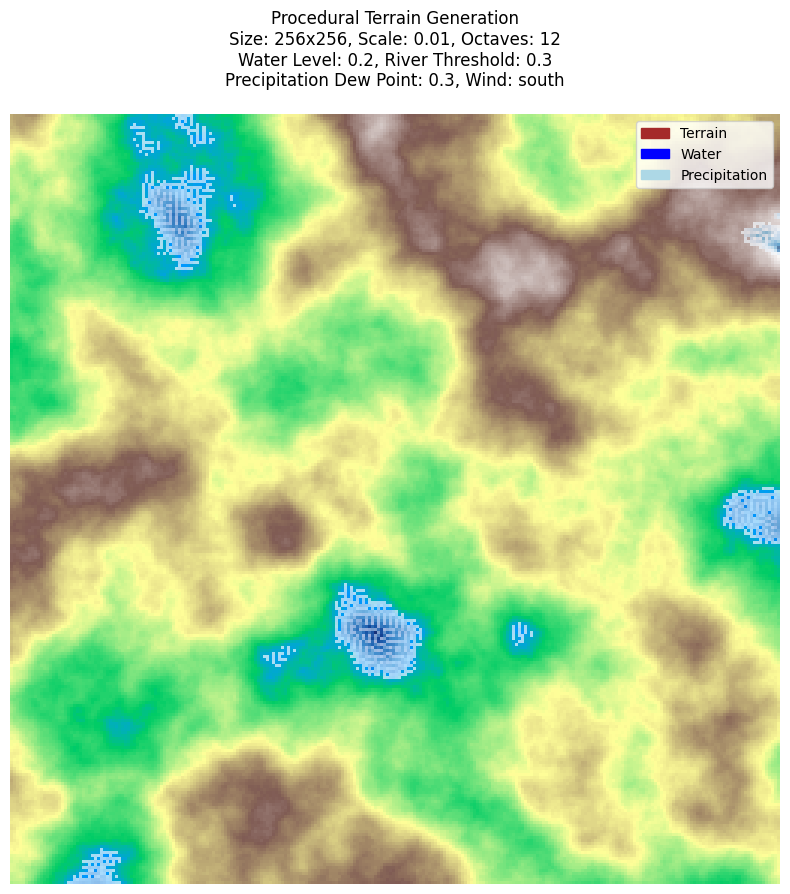


TERRAIN VISUALIZATION SYSTEM DEMONSTRATION COMPLETE
Available visualization types:
• Individual layer plots with automatic colormap selection
• Grid layouts for comparing multiple layers
• Composite maps with transparent overlays
• Shaded relief maps with customizable lighting
• Contour/topographic maps
• Isometric 3D-style projections
• Full 3D surface plots (if matplotlib 3D available)
• Interactive Plotly visualizations (if Plotly available)
• Convenience functions for quick plotting
• Statistical analysis and correlation metrics
• Export capabilities (PNG, SVG, etc.)

All visualizations include robust error handling and fallbacks!


In [95]:
# 9. Save Visualizations
print("\n=== Saving Visualizations ===")

# Create a final comprehensive view and save it
final_fig, final_ax = visualizer.create_composite_map(
    elevation=earth,
    water=water, 
    precipitation=precipitation,
    figsize=(12, 10)
)

# Add a detailed title with parameters
final_ax.set_title(
    f"Procedural Terrain Generation\n"
    f"Size: {earth.size}x{earth.size}, Scale: {earth.scale}, Octaves: {earth.octaves}\n"
    f"Water Level: {water.water_level}, River Threshold: {water.river_threshold}\n"
    f"Precipitation Dew Point: {precipitation.dew_point}, Wind: {precipitation.wind_dir}",
    fontsize=12,
    pad=20
)

try:
    # Save the final visualization
    visualizer.save_visualization(final_fig, "comprehensive_terrain_map.png", dpi=300)
    print("✓ Comprehensive terrain map saved as 'comprehensive_terrain_map.png'")
except Exception as e:
    print(f"⚠ Could not save visualization: {e}")

plt.show()

print("\n" + "="*60)
print("TERRAIN VISUALIZATION SYSTEM DEMONSTRATION COMPLETE")
print("="*60)
print("Available visualization types:")
print("• Individual layer plots with automatic colormap selection")
print("• Grid layouts for comparing multiple layers")  
print("• Composite maps with transparent overlays")
print("• Shaded relief maps with customizable lighting")
print("• Contour/topographic maps")
print("• Isometric 3D-style projections")
print("• Full 3D surface plots (if matplotlib 3D available)")
print("• Interactive Plotly visualizations (if Plotly available)")
print("• Convenience functions for quick plotting")
print("• Statistical analysis and correlation metrics")
print("• Export capabilities (PNG, SVG, etc.)")
print("\nAll visualizations include robust error handling and fallbacks!")

In [ ]:
# 10. Test the New VegetationLayer
print("\n=== Testing VegetationLayer Implementation ===")

# First, reload the generators module to get the new VegetationLayer
import importlib
importlib.reload(generators)

# Create a vegetation layer
print("Creating vegetation layer...")
vegetation = generators.VegetationLayer(
    elevation=earth,
    precipitation=precipitation,
    water=water,
    seed_density=0.015,  # Slightly higher seed density for demonstration
    growth_steps=25,     # More growth steps for better development
    max_elevation=0.7,   # Allow vegetation up to 70% of max elevation
    water_proximity_bonus=0.4,  # Strong bonus near water
    precipitation_factor=0.6,   # Strong precipitation influence
    logging_level=logging.INFO  # Show detailed logs
)

print(f"✓ Vegetation layer created: {vegetation.size}x{vegetation.size}")
print(f"  Range: {vegetation.layer.min():.3f} to {vegetation.layer.max():.3f}")
print(f"  Coverage: {(np.sum(vegetation.layer > 0.1) / vegetation.layer.size * 100):.1f}%")
print(f"  Average density: {vegetation.layer.mean():.3f}")

# Get vegetation statistics
veg_stats = vegetation._repr_json_()
print(f"\nVegetation Statistics:")
print(f"- Min: {veg_stats['min']}, Max: {veg_stats['max']}")
print(f"- Mean: {veg_stats['average']}, Std: {veg_stats['std']}")
print(f"- Seed density: {veg_stats['seed_density']}")
print(f"- Growth steps: {veg_stats['growth_steps']}")
print(f"- Max elevation: {veg_stats['max_elevation']}")

In [ ]:
# 11. Visualize Vegetation Layer
print("\n=== Vegetation Visualization ===")

# Reload visualizers module to get vegetation support
importlib.reload(viz)
visualizer = viz.TerrainVisualizer(logging_level=logging.INFO)

# Individual vegetation plot
print("Creating individual vegetation plot...")
fig_veg, ax_veg = visualizer.plot_single_layer(vegetation, title="Vegetation Distribution", figsize=(8, 6))
plt.show()

# Updated grid with all four layers
print("Creating 4-layer grid...")
all_layers = [earth, precipitation, water, vegetation]
all_titles = ["Elevation", "Precipitation", "Water", "Vegetation"]

fig_all_grid, axes_all_grid = visualizer.plot_layer_grid(
    layers=all_layers,
    titles=all_titles,
    figsize=(16, 8)
)
plt.show()

In [ ]:
# 12. Comprehensive Composite with Vegetation
print("\n=== Complete Ecosystem Visualization ===")

# Create comprehensive composite map with all layers
print("Creating complete ecosystem composite...")
fig_ecosystem, ax_ecosystem = visualizer.create_composite_map(
    elevation=earth,
    water=water,
    precipitation=precipitation,
    vegetation=vegetation,
    alpha_water=0.8,
    alpha_precip=0.4,
    alpha_vegetation=0.7,  # Semi-transparent vegetation
    figsize=(12, 10)
)

# Add comprehensive title
ax_ecosystem.set_title(
    f"Complete Procedural Ecosystem\n"
    f"Terrain • Water • Precipitation • Vegetation\n"
    f"Size: {earth.size}x{earth.size} | Vegetation Coverage: {(np.sum(vegetation.layer > 0.1) / vegetation.layer.size * 100):.1f}%",
    fontsize=14,
    pad=20
)

plt.show()

# Save the complete ecosystem map
try:
    visualizer.save_visualization(fig_ecosystem, "complete_ecosystem_map.png", dpi=300)
    print("✓ Complete ecosystem map saved as 'complete_ecosystem_map.png'")
except Exception as e:
    print(f"⚠ Could not save visualization: {e}")

# Quick correlation analysis including vegetation
print(f"\n=== Ecosystem Correlations ===")
veg_flat = vegetation.layer.flatten()

# Calculate correlations with vegetation
elev_veg_corr = np.corrcoef(elev_flat, veg_flat)[0, 1]
precip_veg_corr = np.corrcoef(precip_flat, veg_flat)[0, 1]
water_veg_corr = np.corrcoef(water_flat, veg_flat)[0, 1]

print(f"Elevation-Vegetation correlation: {elev_veg_corr:.3f}")
print(f"Precipitation-Vegetation correlation: {precip_veg_corr:.3f}")
print(f"Water-Vegetation correlation: {water_veg_corr:.3f}")

print(f"\n=== Ecosystem Summary ===")
print(f"🏔️  Elevation range: {elev_stats['min']:.2f} to {elev_stats['max']:.2f}")
print(f"🌧️  Precipitation coverage: {high_precip_areas:.1f}% high precipitation areas")
print(f"💧 Water coverage: {water_coverage:.1f}% of terrain")
print(f"🌿 Vegetation coverage: {(np.sum(vegetation.layer > 0.1) / vegetation.layer.size * 100):.1f}% of terrain")
print(f"🌍 Total ecosystem diversity: All 4 environmental layers interacting!")